In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import animation, gridspec
import numpy as np
import xarray as xr
import cmocean.cm as cmo
import os

# BSF

In [2]:
time_dependent_fields = xr.open_dataarray('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/VVELcomposite.nc')

<xarray.DataArray 'VVEL' (time: 60, z_t: 60, nlat: 384, nlon: 320)>
[442368000 values with dtype=float32]
Coordinates:
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
    ULONG    (nlat, nlon) float64 ...
    ULAT     (nlat, nlon) float64 ...
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
Dimensions without coordinates: time, nlat, nlon

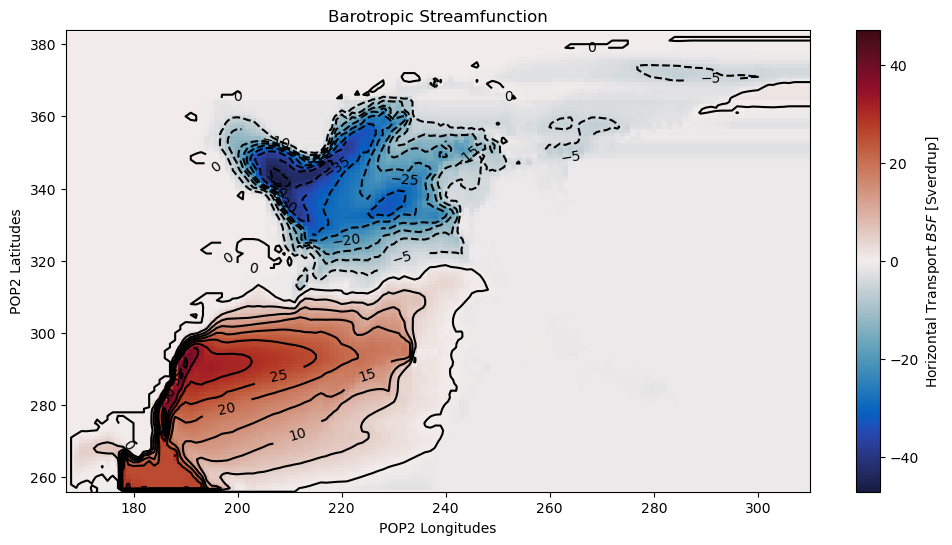

In [33]:
field = time_dependent_fields.isel(time=0)

cmap = cmo.balance
#cmap.set_bad('gray')

plt.figure(figsize=(12, 6))
horiz_sigma_plot = field.plot(cmap=cmap, add_colorbar=False)#, vmin=vmin_sigma, vmax=vmax_sigma)
contour_sigma = field.plot.contour(colors='k', levels=21, add_colorbar=False) 
plt.clabel(contour_sigma, inline=True, fontsize=10)

plt.xlim([167, 310])
plt.ylim([256, 384])

plt.ylabel('POP2 Latitudes')
plt.xlabel('POP2 Longitudes')
plt.title('Barotropic Streamfunction')

cbar = plt.colorbar(horiz_sigma_plot)
cbar.set_label('Horizontal Transport $BSF$ [Sverdrup]')  # Add your colorbar label here

plt.show()

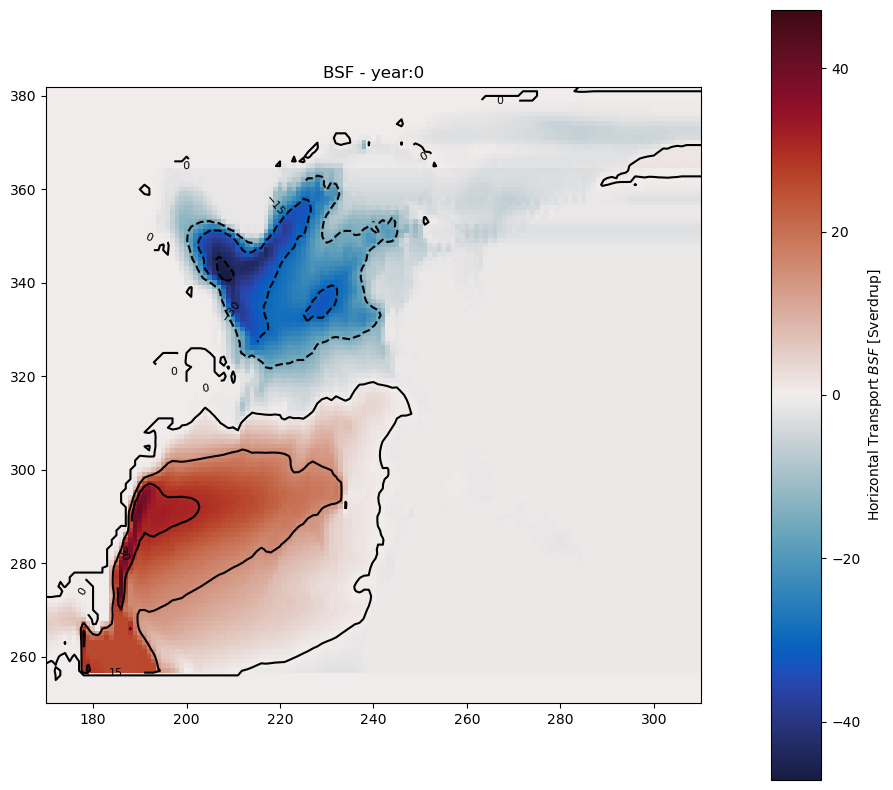

In [41]:
def plot_var_frame(time_step):
    data = ds.isel(time=start + time_step)
    ax1.cla()
    im = ax1.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax) 
    contour = ax1.contour(data, colors='k')
    ax1.clabel(contour, inline=True, fontsize=8)

    ax1.set_xlim([170, 310])
    ax1.set_ylim([250, 382])
        
    ax1.set_title(f'BSF - year:{time_step}')
    

ds = time_dependent_fields
vmin, vmax = -abs(ds).max(), abs(ds).max()
start = 0

# create figure and set up layout of subplots
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[13, 1])

# main subplot for animation
ax1 = plt.subplot(gs[0])

# colorbar subplot 
cax = plt.subplot(gs[1])
num_time_steps = 3
ani = animation.FuncAnimation(fig, plot_var_frame, frames=num_time_steps, interval=800)

# set colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label('Horizontal Transport $BSF$ [Sverdrup]')

# Save animation
ani.save(os.path.expanduser('~/phase1_CONDA/results/') + 'annual_BSF.gif', writer='pillow', fps=3)

# dMOC

In [4]:
time_dependent_fields = xr.open_dataarray('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/dMOCcomposite.nc')

In [5]:
time_dependent_fields

<xarray.DataArray (time: 60, z_t: 60, nlat: 384)>
[1382400 values with dtype=float64]
Coordinates:
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
  * time     (time) object 1915-12-31 00:00:00 ... 1915-12-31 00:00:00
Dimensions without coordinates: nlat

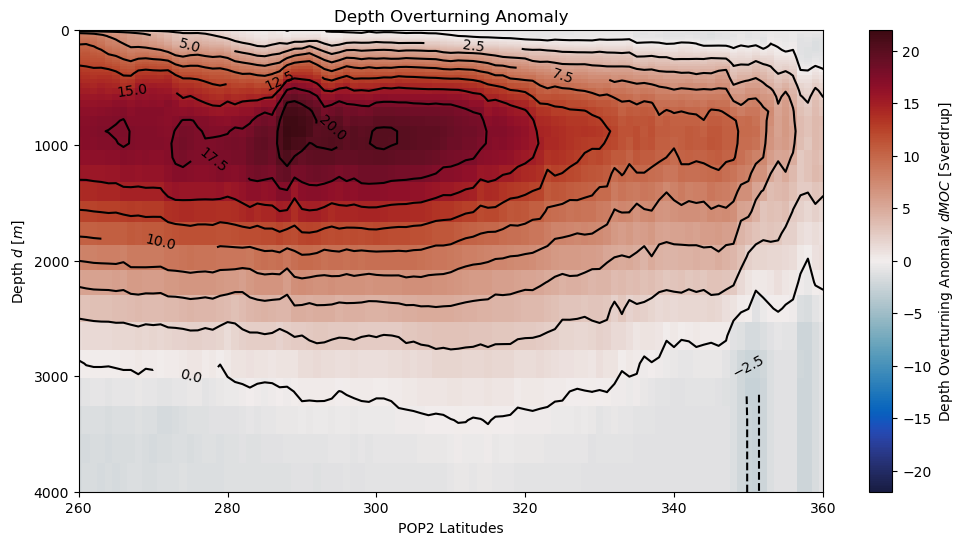

In [99]:
field = time_dependent_fields.isel(time=2)

cmap = cmo.balance
cmap.set_bad('gray')

plt.figure(figsize=(12, 6))
horiz_sigma_plot = field.plot(cmap=cmap, yincrease = False, add_colorbar=False)
contour_sigma = field.plot.contour(colors='k', yincrease = False, levels=19, add_colorbar=False) 
plt.clabel(contour_sigma, inline=True, fontsize=10)

plt.xlim([260, 360])
plt.ylim([400000, 0])

current_y_ticks = plt.yticks()[0]
new_y_ticks = np.array(current_y_ticks)[::2]  # Take every second tick
new_y_tick_labels = ['{:g}'.format(float(tick) * 1e-2) for tick in new_y_ticks]
plt.yticks(new_y_ticks, new_y_tick_labels)

plt.ylabel(r'Depth $d$ [$m$]')
plt.xlabel('POP2 Latitudes')
plt.title('Depth Overturning Anomaly')

cbar = plt.colorbar(horiz_sigma_plot)
cbar.set_label('Depth Overturning Anomaly $dMOC$ [Sverdrup]')  

plt.show()

<Figure size 1000x1000 with 0 Axes>

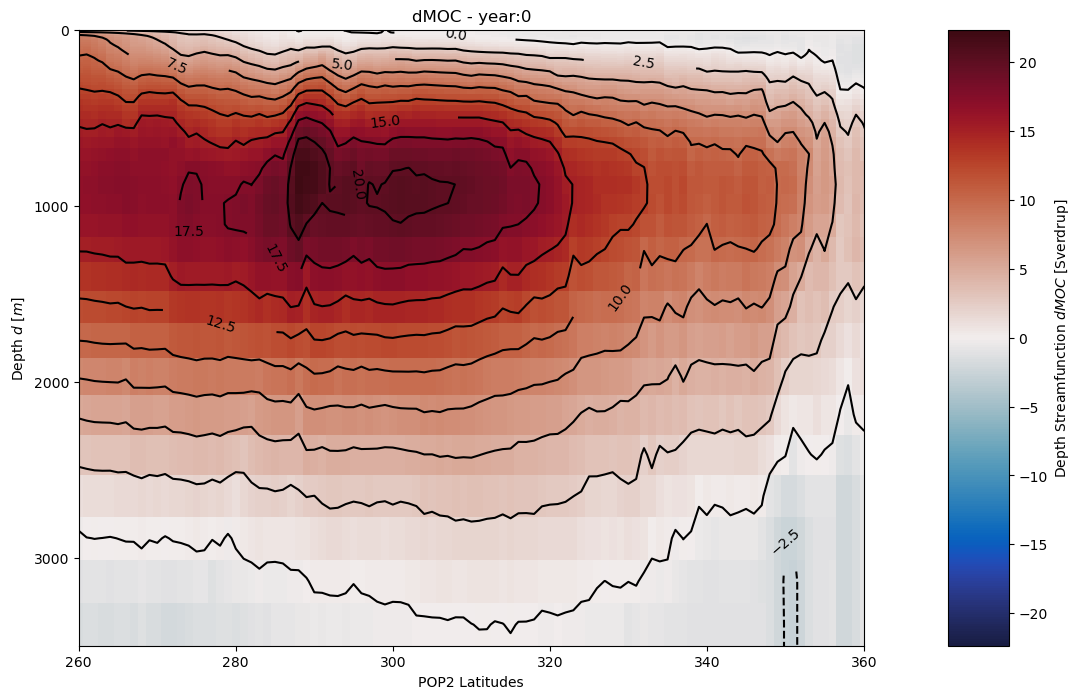

In [100]:
def plot_var_frame(time_step):
    data = ds.isel(time=start + time_step)
    ax1.cla()
    im = data.plot(ax=ax1, cmap=cmap, yincrease = False, add_colorbar=False, vmin=vmin, vmax=vmax)
    contour = data.plot.contour(ax=ax1, colors='k', yincrease = False, levels=19, add_colorbar=False) 
    ax1.clabel(contour, inline=True, fontsize=10)
    ax1.set_xlim([260, 360])
    ax1.set_ylim([350000, 0])

    current_y_ticks = ax1.get_yticks()
    new_y_ticks = np.array(current_y_ticks)[::2] 
    new_y_tick_labels = ['{:g}'.format(float(tick) * 1e-2) for tick in new_y_ticks]
    ax1.set_yticks(new_y_ticks)
    ax1.set_yticklabels(new_y_tick_labels)
    
    ax1.set_ylabel(r'Depth $d$ [$m$]')
    ax1.set_xlabel('POP2 Latitudes')
    
    ax1.set_title(f'dMOC - year:{time_step}')
    
ds = time_dependent_fields
vmin, vmax = -abs(ds).max(), abs(ds).max()
start = 0

# create figure and set up layout of subplots
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[13, 1])

# create figure and set up layout of subplots
fig = plt.figure(figsize=(12, 8))

# main subplot for animation
ax1 = plt.subplot(gs[0])

# colorbar subplot 
cax = plt.subplot(gs[1])
num_time_steps = 3
ani = animation.FuncAnimation(fig, plot_var_frame, frames=num_time_steps, interval=800)

# set colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label(r'Depth Streamfunction $dMOC$ [Sverdrup]', )

# Save animation
ani.save(os.path.expanduser('~/phase1_CONDA/results/') + 'annual_dMOC.gif', writer='pillow', fps=3)

# sMOC

In [6]:
time_dependent_fields = xr.open_dataarray('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/sMOCcomposite.nc')

In [7]:
time_dependent_fields

<xarray.DataArray 'densMOC' (time: 60, sigma: 87, nlat: 110)>
[574200 values with dtype=float64]
Coordinates:
  * sigma    (sigma) float64 12.0 16.0 20.0 24.0 28.0 ... 39.0 40.0 41.0 42.0
  * time     (time) object 1915-12-31 00:00:00 ... 1915-12-31 00:00:00
  * nlat     (nlat) int64 250 251 252 253 254 255 ... 354 355 356 357 358 359

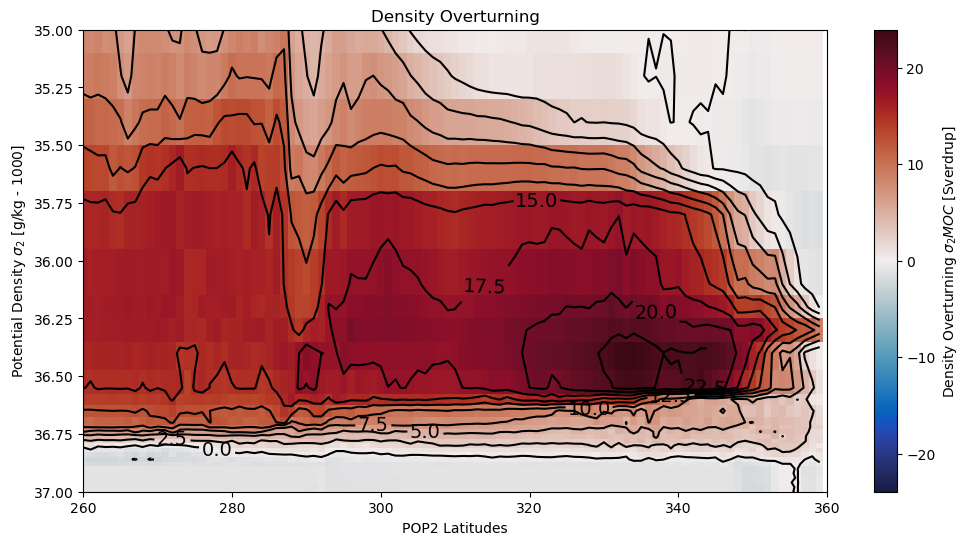

In [8]:
field = time_dependent_fields.isel(time=0)

cmap = cmo.balance
cmap.set_bad('gray')

plt.figure(figsize=(12, 6))
horiz_sigma_plot = field.plot(cmap=cmap, add_colorbar = False)#, vmin=vmin_sigma, vmax=vmax_sigma)
contour_sigma = field.plot.contour(colors='k', levels=21, add_colorbar = False) 
plt.clabel(contour_sigma, inline=True, fontsize=14)

plt.xlim([260, 360])
plt.ylim(37, 35)

plt.ylabel(r'Potential Density $\sigma_2$ [g/kg - 1000]')
plt.xlabel('POP2 Latitudes')
plt.title('Density Overturning')

cbar = plt.colorbar(horiz_sigma_plot)
cbar.set_label('Density Overturning $\sigma_2 MOC$ [Sverdrup]')  

plt.show()

<Figure size 1000x1000 with 0 Axes>

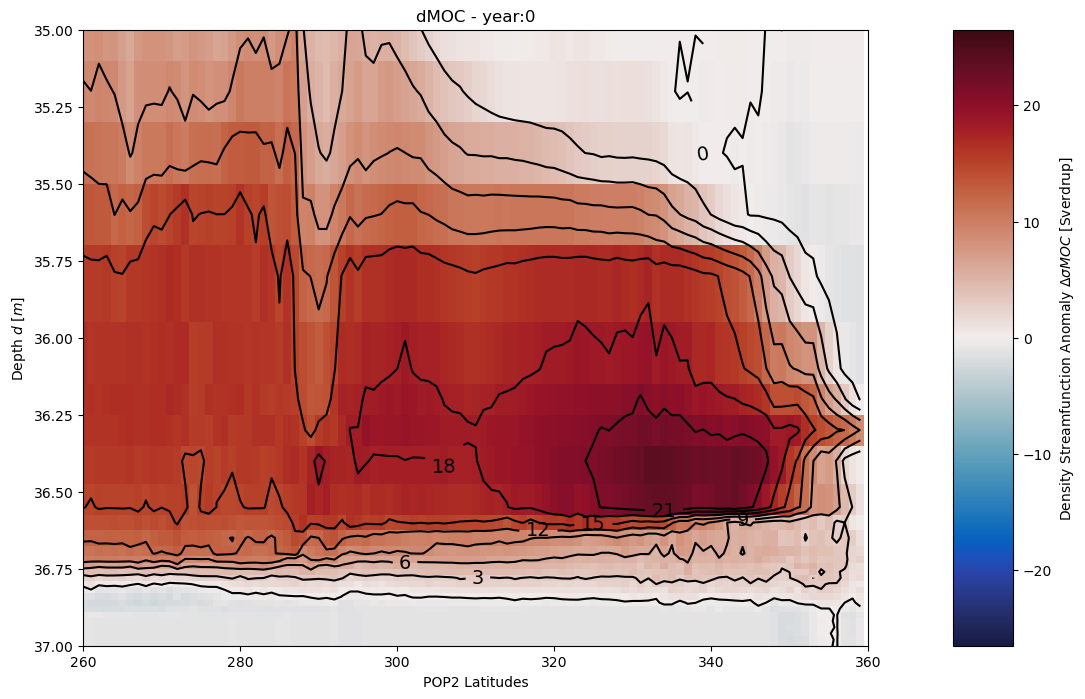

In [9]:
def plot_var_frame(time_step):
    data = ds.isel(time=start + time_step)
    ax1.cla()
    im = data.plot(ax=ax1, cmap=cmap, yincrease = False, add_colorbar=False, vmin=vmin, vmax=vmax)
    contour = data.plot.contour(ax=ax1, colors='k', yincrease = False, levels=19, add_colorbar=False) 
    ax1.clabel(contour, inline=True, fontsize=14)

    ax1.set_xlim([260, 360])
    ax1.set_ylim([37, 35])
    
    ax1.set_ylabel(r'Depth $d$ [$m$]')
    ax1.set_xlabel('POP2 Latitudes')
    
    ax1.set_title(f'dMOC - year:{time_step}')
    
ds = time_dependent_fields
vmin, vmax = -abs(ds).max(), abs(ds).max()
start = 0

# create figure and set up layout of subplots
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[13, 1])

# create figure and set up layout of subplots
fig = plt.figure(figsize=(12, 8))

# main subplot for animation
ax1 = plt.subplot(gs[0])

# colorbar subplot 
cax = plt.subplot(gs[1])
num_time_steps = 3
ani = animation.FuncAnimation(fig, plot_var_frame, frames=num_time_steps, interval=800)

# set colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label(r'Density Streamfunction Anomaly $\Delta \sigma MOC$ [Sverdrup]')

# Save animation
ani.save(os.path.expanduser('~/phase1_CONDA/results/') + 'annual_sMOC.gif', writer='pillow', fps=3)